In [37]:
import pandas as pd
import numpy as np
import glob
import re
from Functions import *

In [38]:
foldername = "../data/Vertical_EME gapy 8um/"
# 获取所有匹配的文件
filename_list = glob.glob(foldername + 'len_taper_RDL-*.txt')
filename_list

['../data/Vertical_EME gapy 8um/len_taper_RDL-200.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-600.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-400.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-300.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-100.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-500.txt',
 '../data/Vertical_EME gapy 8um/len_taper_RDL-700.txt']

In [39]:
len_prop_arr = np.linspace(200,1500,651)

In [40]:
# 创建一个空的DataFrame用于存储所有数据
df_data = pd.DataFrame()
file_list = []
# 遍历每个文件
for filename in filename_list:
    # 使用正则表达式提取xxx数字部分
    match = re.search(r'len_taper_RDL-(\d+)\.txt', filename)
    len_taper = int(match.group(1))
    file_list.append((len_taper,filename))

file_list.sort(key=lambda file: file[0])

df_data['len_prop'] = len_prop_arr
for len_taper, file in file_list:

    # 读取文件内容，假设每行一个数据点
    data = pd.read_csv(file, header=None, names=[len_taper])

    # 将数据合并到主DataFrame中
    if df_data.empty:
        df_data = data
    else:
        df_data = pd.concat([df_data, data], axis=1)

# 显示结果
print(df_data)
df_data.to_csv("./results/EME_res.csv")

     len_prop       100       200       300       400       500       600  \
0       200.0  0.005293  0.009826  0.015579  0.021398  0.026948  0.033779   
1       202.0  0.005435  0.010036  0.015859  0.021737  0.027330  0.034205   
2       204.0  0.005580  0.010248  0.016142  0.022080  0.027717  0.034635   
3       206.0  0.005728  0.010464  0.016430  0.022428  0.028108  0.035070   
4       208.0  0.005879  0.010684  0.016721  0.022780  0.028503  0.035510   
..        ...       ...       ...       ...       ...       ...       ...   
646    1492.0  0.995078  0.998483  0.998944  0.997734  0.996650  0.995697   
647    1494.0  0.995388  0.998577  0.998849  0.997495  0.996337  0.995339   
648    1496.0  0.995684  0.998656  0.998738  0.997241  0.996009  0.994967   
649    1498.0  0.995963  0.998720  0.998613  0.996973  0.995666  0.994580   
650    1500.0  0.996228  0.998768  0.998473  0.996690  0.995309  0.994179   

          700  
0    0.043632  
1    0.044125  
2    0.044623  
3    0.0451

array(['100', '200', '300', '400', '500', '600', '700'], dtype='<U51')

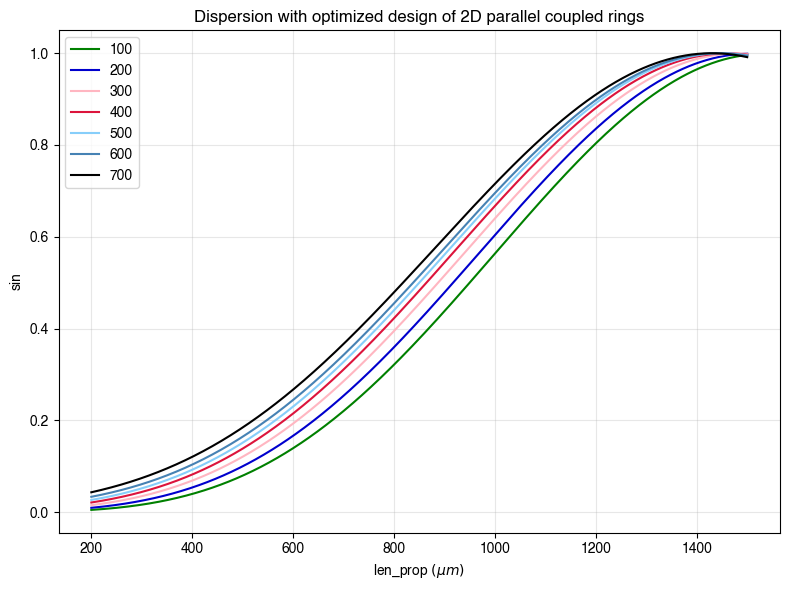

In [56]:
colors_list = ['green','mediumblue','LightPink','crimson','lightskyblue','steelblue','black']*2
param_dict = {  "Y_legends"     : np.array(file_list)[:,0],
                "X_label"       : r"len_prop $(\mu m)$",
                "Y_label"       : "sin",
                "title"         : "Dispersion with optimized design of 2D parallel coupled rings",
                "figsize"       : (8,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                # "xticks"        : xticks,
                # "xtickslabel"   : np.flip(xtickslabels),
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}

Plot_curve((np.c_[np.array(df_data.iloc[:,0]),np.array(df_data.iloc[:,1:])],),**param_dict)